# EDA task on Land Surface temperature data for all district -Mean temperature day and Mean tempearture night

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
# Read the dataset from data folder and name the dataframe as district_df
district_df=pd.read_csv("../data/LST_all_districts.csv")
print(f'Shape of LST for all districts is: {district_df.shape}')

Shape of LST for all districts is: (1152, 6)


In [3]:
district_df.head()

,Unnamed: 0,Mean Temperature Day,Mean Temperature Night,year,.geo,District
0,0,214.374876,139.273820,2003.0,"{""type"":""MultiPoint"",""coordinates"":[]}",Bagerhat
1,1,229.434543,131.191025,2004.0,"{""type"":""MultiPoint"",""coordinates"":[]}",Bagerhat
2,2,241.823592,124.376524,2005.0,"{""type"":""MultiPoint"",""coordinates"":[]}",Bagerhat
3,3,246.670103,133.092567,2006.0,"{""type"":""MultiPoint"",""coordinates"":[]}",Bagerhat
4,4,234.309171,128.190068,2007.0,"{""type"":""MultiPoint"",""coordinates"":[]}",Bagerhat


## Define the terminology 
##### LST-  "Land Surface Temperature." 
It is a key parameter in remote sensing and Earth observation, particularly in the field of geospatial analysis and environmental monitoring. LST refers to the temperature of the Earth's surface, specifically the temperature of the ground or various land cover types. It is typically measured in degrees Celsius (°C)
##### Mean Temperature day :-
  Mean temperature day" typically refers to the average temperature during the daylight hours of a specific day. It's a measure of the central tendency of temperature readings taken throughout the day, often calculated as the arithmetic mean of hourly temperature measurements recorded during the daylight hours.One can track daily temperature patterns. 
##### Mean Temperature Night :-
"Mean temperature night" typically refers to the average temperature during the nighttime hours of a specific day. It's a measure of the central tendency of temperature readings taken during the nighttime hours, often calculated as the arithmetic mean of hourly temperature measurements recorded during the night.



In [4]:
# Check null values count for each feature
district_df.isnull().sum()

Unnamed: 0                0
Mean Temperature Day      0
Mean Temperature Night    0
year                      0
.geo                      0
District                  0
dtype: int64

In [5]:
district_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1152 non-null   int64  
 1   Mean Temperature Day    1152 non-null   float64
 2   Mean Temperature Night  1152 non-null   float64
 3   year                    1152 non-null   float64
 4   .geo                    1152 non-null   object 
 5   District                1152 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 54.1+ KB


In [6]:
district_df.columns

Index(['Unnamed: 0', 'Mean Temperature Day', 'Mean Temperature Night', 'year',
       '.geo', 'District'],
      dtype='object')

In [7]:
# Drop Currency column
district_df.drop(['Unnamed: 0'], axis =1, inplace=True)

In [8]:
# Convert all the culumns labels to lower case
district_df.columns = district_df.columns.str.lower()
district_df.columns

Index(['mean temperature day', 'mean temperature night', 'year', '.geo',
       'district'],
      dtype='object')

In [9]:
district_df.rename({'mean temperature day'  :'mean_temp_day', 'mean temperature night' :'mean_temp_night'},axis =1, inplace= True)

### Converting Mean Temperature day and Mean Temperature night in °C 

In [10]:
# Assuming df is your DataFrame
district_df['mean_temp_day'] = (district_df['mean_temp_day'] - 32) * 5/9
district_df['mean_temp_night'] = (district_df['mean_temp_night']- 32) * 5/9

In [11]:
district_df.head()

,mean_temp_day,mean_temp_night,year,.geo,district
0,101.319376,59.596566,2003.0,"{""type"":""MultiPoint"",""coordinates"":[]}",Bagerhat
1,109.685857,55.106125,2004.0,"{""type"":""MultiPoint"",""coordinates"":[]}",Bagerhat
2,116.568662,51.320291,2005.0,"{""type"":""MultiPoint"",""coordinates"":[]}",Bagerhat
3,119.261168,56.162537,2006.0,"{""type"":""MultiPoint"",""coordinates"":[]}",Bagerhat
4,112.393984,53.438927,2007.0,"{""type"":""MultiPoint"",""coordinates"":[]}",Bagerhat


In [12]:
district_df.district.value_counts()

district
Bagerhat        18
Bandarban       18
Magura          18
Manikganj       18
Meherpur        18
                ..
Khagrachhari    18
Khulna          18
Kishoreganj     18
Kurigram        18
Thakurgaon      18
Name: count, Length: 64, dtype: int64

In [13]:
district_df['district'].unique()

array(['Bagerhat', 'Bandarban', 'Barguna', 'Barishal', 'Bhola', 'Bogura',
       'Brahmanbaria', 'Chandpur', 'Chapainababganj', 'Chattogram',
       'Chuadanga', 'CoxsBazar', 'Cumilla', 'Dhaka', 'Dinajpur',
       'Faridpur', 'Feni', 'Gaibandha', 'Gazipur', 'Gopalganj',
       'Habiganj', 'Jamalpur', 'Jashore', 'Jhalokati', 'Jhenaidah',
       'Joypurhat', 'Khagrachhari', 'Khulna', 'Kishoreganj', 'Kurigram',
       'Kushtia', 'Lakshmipur', 'Lalmonirhat', 'Madaripur', 'Magura',
       'Manikganj', 'Meherpur', 'Moulvibazar', 'Munshiganj', 'Mymensingh',
       'Naogaon', 'Narail', 'Narayanganj', 'Narsingdi', 'Natore',
       'Netrakona', 'Nilphamari', 'Noakhali', 'Pabna', 'Panchagarh',
       'Patuakhali', 'Pirojpur', 'Rajbari', 'Rajshahi', 'Rangamati',
       'Rangpur', 'Satkhira', 'Shariatpur', 'Sherpur', 'Sirajganj',
       'Sunamganj', 'Sylhet', 'Tangail', 'Thakurgaon'], dtype=object)

Total 64 district data of Bangaladesh

In [14]:
district_df['year'].unique()

array([2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011.,
       2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.])

18 years of mean LST_day and LST_night data

In [15]:
# Check is there any duplicates
district_df.duplicated().sum()

0

### Added Combined Weather dataset

In [16]:
# Read the dataset from data folder and name the dataframe as district_df
weather_df=pd.read_csv("../data/concatenated_data1.csv")
print(f'Shape of Weather is: {weather_df.shape}')

Shape of Weather is: (38809, 49)


In [17]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38809 entries, 0 to 38808
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         38809 non-null  int64  
 1   datetime                      38809 non-null  object 
 2   name                          38809 non-null  object 
 3   tempmax_x                     38809 non-null  float64
 4   tempmin_x                     38809 non-null  float64
 5   temp                          38809 non-null  float64
 6   feelslikemax                  38809 non-null  float64
 7   feelslikemin                  38809 non-null  float64
 8   feelslike                     38809 non-null  float64
 9   dew                           38809 non-null  float64
 10  humidity                      38809 non-null  float64
 11  precip                        38809 non-null  float64
 12  precipprob                    38809 non-null  int64  
 13  p

#### Convert 'datetime' column to datetime format

In [18]:
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])
# Extract year from the 'datetime' column
weather_df['year'] = weather_df['datetime'].dt.year

#### Applied Group by function on weather_df year and temp 

In [19]:
# Created new df from weather_df dataframe
df_temperature = weather_df.groupby(['year'])['temp'].mean().reset_index()

In [20]:
df_temperature.head()

,year,temp
0,2012,57.924841
1,2013,49.713569
2,2014,40.749310
3,2015,36.213233
4,2016,36.880713


### Merge two dataframe 'df_temperature' and 'district_df'

In [21]:
# Merge the DataFrames on 'Year'
merged_data = pd.merge(df_temperature, district_df, on='year')
merged_data.head()

,year,temp,mean_temp_day,mean_temp_night,.geo,district
0,2012,57.924841,113.505469,47.865895,"{""type"":""MultiPoint"",""coordinates"":[]}",Bagerhat
1,2012,57.924841,122.579922,55.422748,"{""type"":""MultiPoint"",""coordinates"":[]}",Bandarban
2,2012,57.924841,120.524437,45.251588,"{""type"":""MultiPoint"",""coordinates"":[]}",Barguna
3,2012,57.924841,111.672875,48.880660,"{""type"":""MultiPoint"",""coordinates"":[]}",Barishal
4,2012,57.924841,121.684979,46.698663,"{""type"":""MultiPoint"",""coordinates"":[]}",Bhola


In [22]:
merged_data.columns

Index(['year', 'temp', 'mean_temp_day', 'mean_temp_night', '.geo', 'district'], dtype='object')

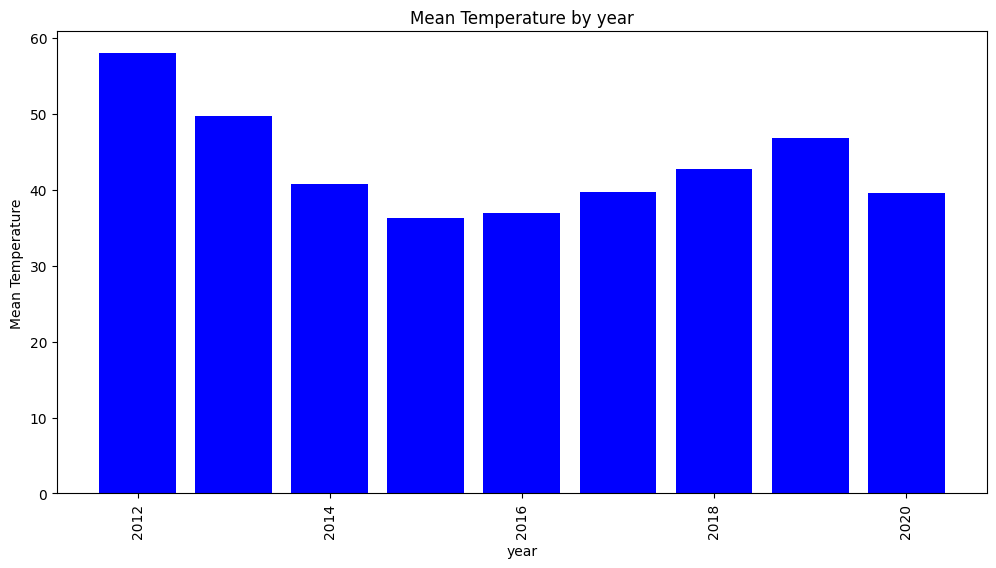

In [23]:
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(merged_data['year'], merged_data['temp'], color='blue')

plt.title('Mean Temperature by year')
plt.xlabel('year')
plt.ylabel('Mean Temperature')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.show()

##### We can see Mean temperature is high in the year 2012 

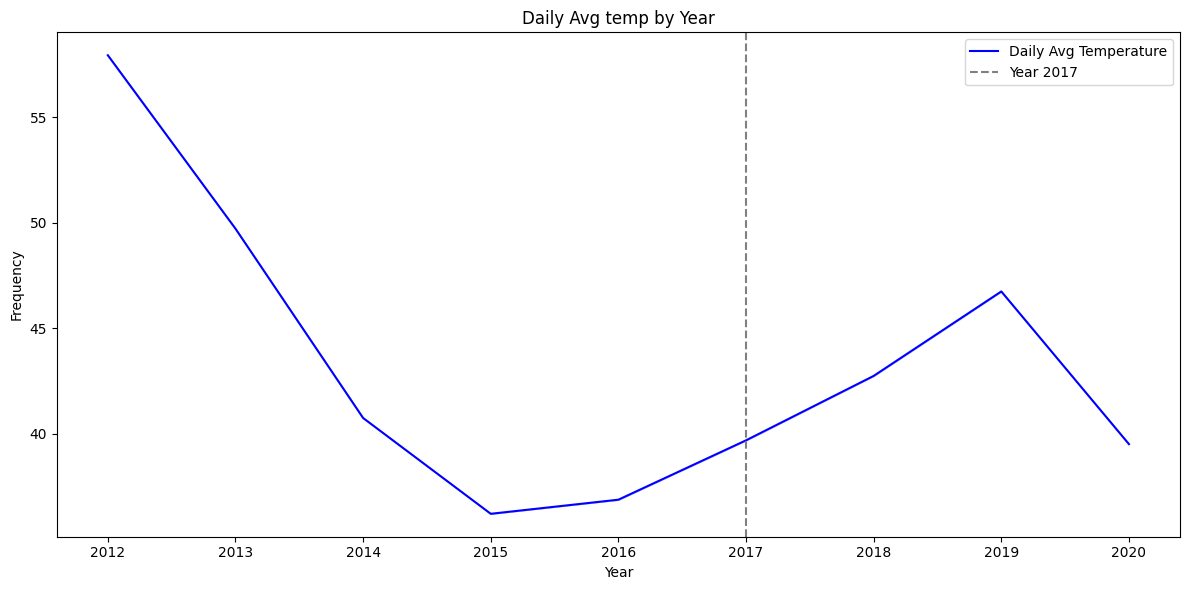

In [24]:
# Create a single set of axes for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Daily Avg Temperature
sns.lineplot(x='year', y='temp', data=merged_data, color='blue', label='Daily Avg Temperature', ax=ax)
ax.set_title('Daily Avg temp by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Frequency')
ax.set_xticks(merged_data['year'].unique())

# Add a vertical dotted line at year 2017
ax.axvline(x=2017, color='gray', linestyle='--', label='Year 2017')

# Show the legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


##### We can see frequency mean temp dropped in the year 2015 and increase in 2019 again drop in the year 2020

## Convert datatype 

In [25]:
merged_data.year=merged_data.year.astype(int)
merged_data.mean_temp_day=merged_data.mean_temp_day.astype(int)
merged_data.mean_temp_night=merged_data.mean_temp_night.astype(int)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             576 non-null    int32  
 1   temp             576 non-null    float64
 2   mean_temp_day    576 non-null    int32  
 3   mean_temp_night  576 non-null    int32  
 4   .geo             576 non-null    object 
 5   district         576 non-null    object 
dtypes: float64(1), int32(3), object(2)
memory usage: 20.4+ KB


In [26]:
merged_data.describe()

,year,temp,mean_temp_day,mean_temp_night
count,576.000000,576.000000,576.000000,576.000000
mean,2016.000000,43.352080,123.019097,53.078125
std,2.584233,6.609203,10.945143,11.475000
min,2012.000000,36.213233,90.000000,20.000000
25%,2014.000000,39.512270,116.000000,47.000000
50%,2016.000000,40.749310,124.000000,55.000000
75%,2018.000000,46.741178,131.000000,61.000000
max,2020.000000,57.924841,153.000000,81.000000


# Outliers
-Boxplot to assess outliers in mean_temp_day and mean_temp_night variables

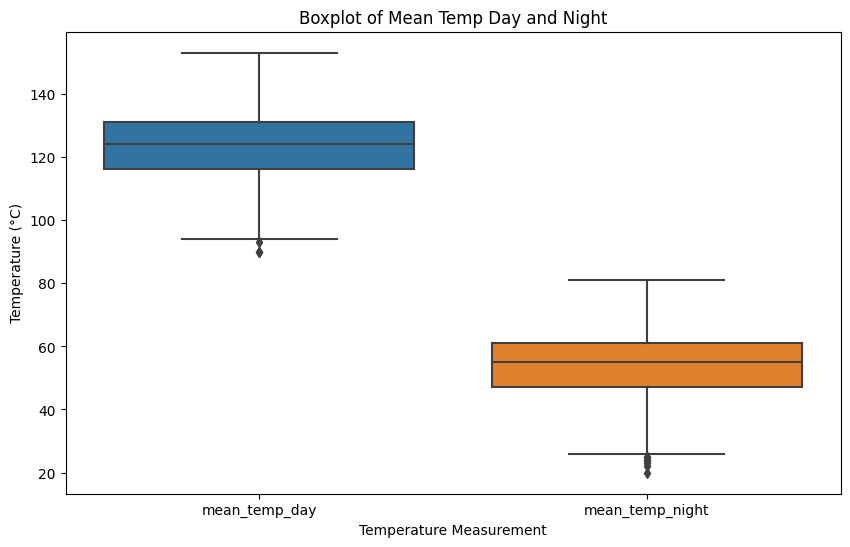

In [27]:
# Create a boxplot to compare the distributions of both variables
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(data=merged_data[['mean_temp_day', 'mean_temp_night']])
plt.title('Boxplot of Mean Temp Day and Night')
plt.xlabel('Temperature Measurement')
plt.ylabel('Temperature (°C)')
plt.show()

Above visualiation we can see outliers are available in both the variables 

### Calculate lower and upper bounds for outliers

In [28]:

Q1_day = merged_data['mean_temp_day'].quantile(0.25)
Q3_day = merged_data['mean_temp_day'].quantile(0.75)
IQR_day = Q3_day - Q1_day
lb_day = Q1_day - 1.5 * IQR_day
ub_day = Q3_day + 1.5 * IQR_day

# Calculate quartiles and IQR for mean_temp_night
Q1_night = merged_data['mean_temp_night'].quantile(0.25)
Q3_night = merged_data['mean_temp_night'].quantile(0.75)
IQR_night = Q3_night - Q1_night
lb_night = Q1_night - 1.5 * IQR_night
ub_night = Q3_night + 1.5 * IQR_night

# Filter the merged_data DataFrame to remove outliers for both columns
merged_data_no_outliers = merged_data[
    (merged_data['mean_temp_day'] >= lb_day) &
    (merged_data['mean_temp_day'] <= ub_day) &
    (merged_data['mean_temp_night'] >= lb_night) &
    (merged_data['mean_temp_night'] <= ub_night)
]

# The resulting merged_data_no_outliers DataFrame contains data without outliers for both "mean_temp_day" and "mean_temp_night"
merged_data_no_outliers.head()


,year,temp,mean_temp_day,mean_temp_night,.geo,district
0,2012,57.924841,113,47,"{""type"":""MultiPoint"",""coordinates"":[]}",Bagerhat
1,2012,57.924841,122,55,"{""type"":""MultiPoint"",""coordinates"":[]}",Bandarban
2,2012,57.924841,120,45,"{""type"":""MultiPoint"",""coordinates"":[]}",Barguna
3,2012,57.924841,111,48,"{""type"":""MultiPoint"",""coordinates"":[]}",Barishal
4,2012,57.924841,121,46,"{""type"":""MultiPoint"",""coordinates"":[]}",Bhola


Now we have dataset without outliers for further analysis

In [29]:
print(district_df.shape)
print(merged_data_no_outliers.shape)

(1152, 5)
(566, 6)


In [30]:
merged_data_no_outliers.mean_temp_day.value_counts()
# Assigned variable
mean_temp= merged_data_no_outliers.mean_temp_day.value_counts().head(10)
mean_temp

mean_temp_day
126    30
132    26
129    24
122    24
127    23
120    21
118    21
121    21
125    19
114    19
Name: count, dtype: int64

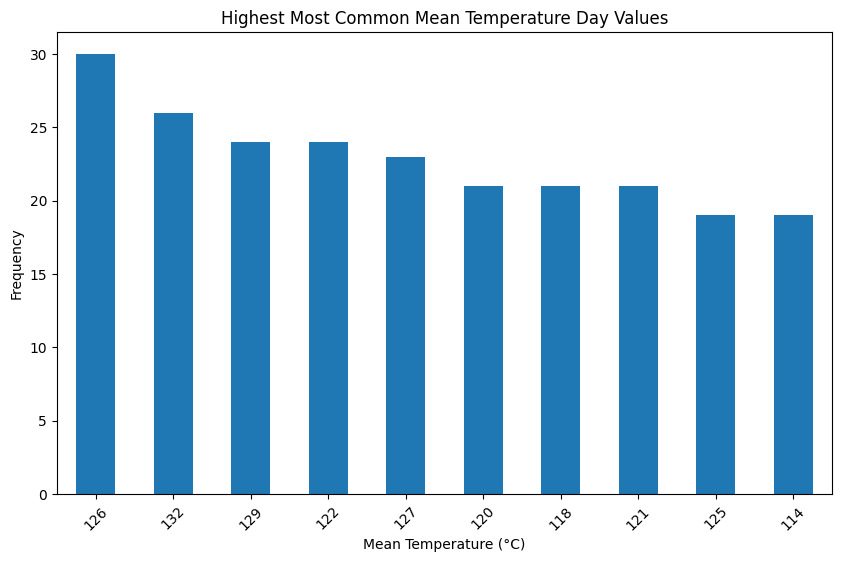

In [31]:
# Assuming you have already calculated the 'mean_temp' variable with the top 10 counts
mean_temp = merged_data_no_outliers['mean_temp_day'].value_counts().head(10)

# Create a bar chart to visualize the top 10 most common temperature values
plt.figure(figsize=(10, 6))
mean_temp.plot(kind='bar')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Highest Most Common Mean Temperature Day Values')
plt.xticks(rotation=45)
plt.show()

- Mean temperature day "126" recorded and they have the highest frequency in day time

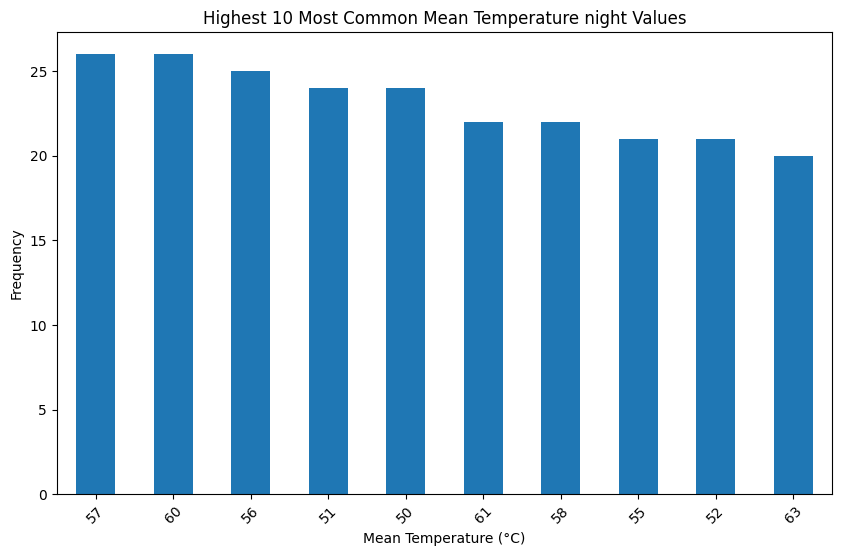

In [32]:
# Assigned variable
mean_temp= merged_data_no_outliers.mean_temp_night.value_counts().head(10)
# Create a bar chart to visualize the top 10 most common temperature values
plt.figure(figsize=(10, 6))
mean_temp.plot(kind='bar')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Highest 10 Most Common Mean Temperature night Values')
plt.xticks(rotation=45)
plt.show()

Mean tempearture night  "57 " recorded highest frequency in the night time

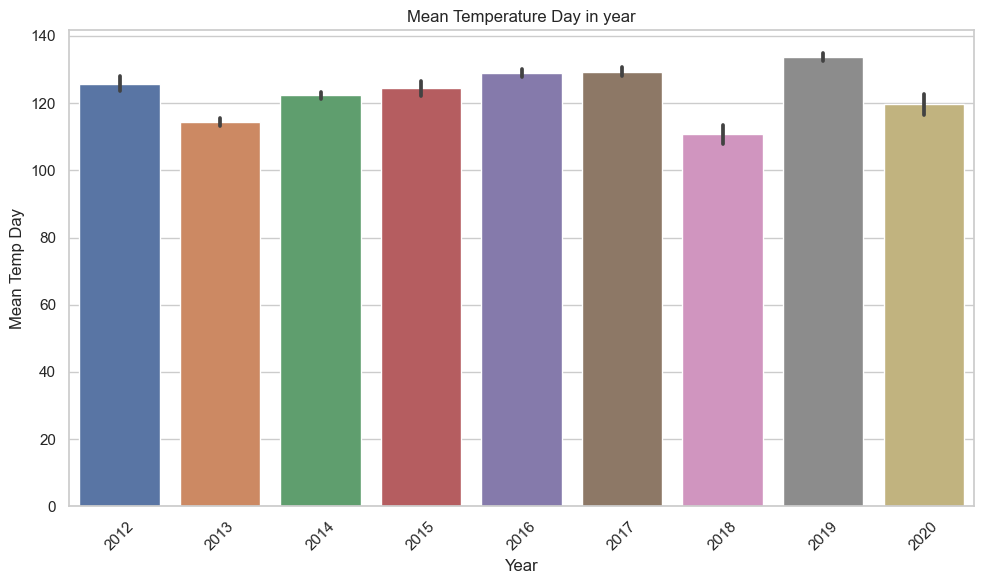

In [33]:
# To set the style for the plot 
sns.set(style="whitegrid")

# Create Barplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
barplot = sns.barplot(x='year', y='mean_temp_day', data=merged_data_no_outliers)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Mean Temp Day')
plt.title('Mean Temperature Day in year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the 
plt.tight_layout()
plt.show()

Mean temperature day is highest in the year 2019 

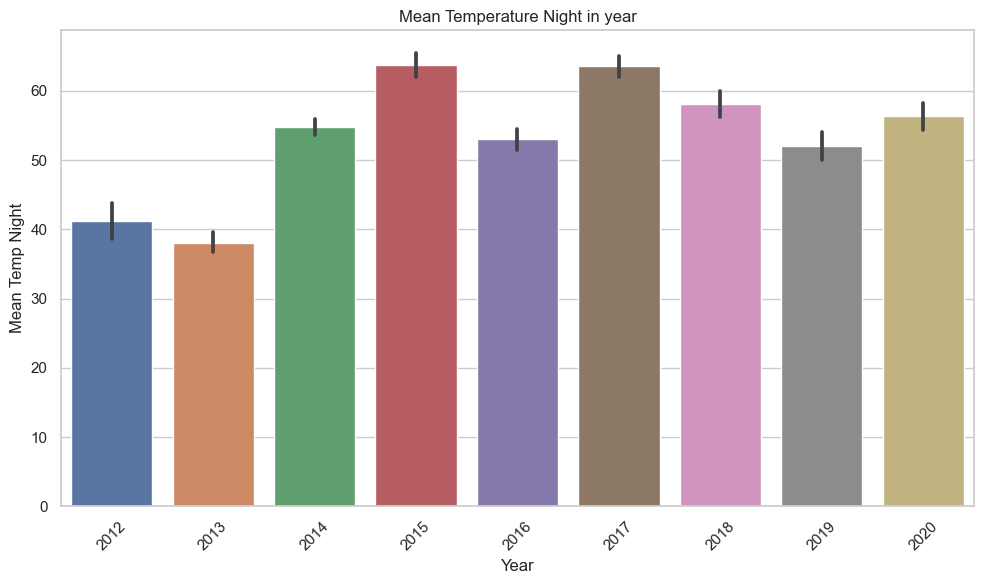

In [34]:
# To set the style for the plot 
sns.set(style="whitegrid")

# Create Barplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
barplot = sns.barplot(x='year', y='mean_temp_night', data=merged_data_no_outliers)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Mean Temp Night')
plt.title('Mean Temperature Night in year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the 
plt.tight_layout()
plt.show()

Mean temp night is highest in the year 2015 and 2017 

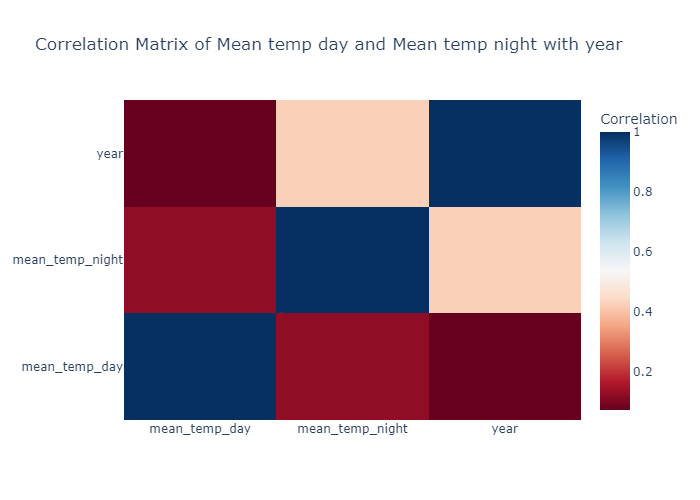

In [35]:
import plotly.io as pio
from IPython.display import Image
correlation_matrix =merged_data_no_outliers[['mean_temp_day', 'mean_temp_night', 'year']].corr()

# Visualize the correlation matrix using a heatmap
fig_heatmap = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='RdBu',
                   colorbar=dict(title='Correlation')))

fig_heatmap.update_layout(title='Correlation Matrix of Mean temp day and Mean temp night with year')

# Save the heatmap as an image
img_bytes = pio.to_image(fig_heatmap, format="png")  # Change 'fig' to 'fig_heatmap'
# Displa the image
Image(img_bytes)

##### Represents positive coorelation year vs Mean_temp_day and year vs Mean_temp_night

### Mean temperature day for all 64 districts

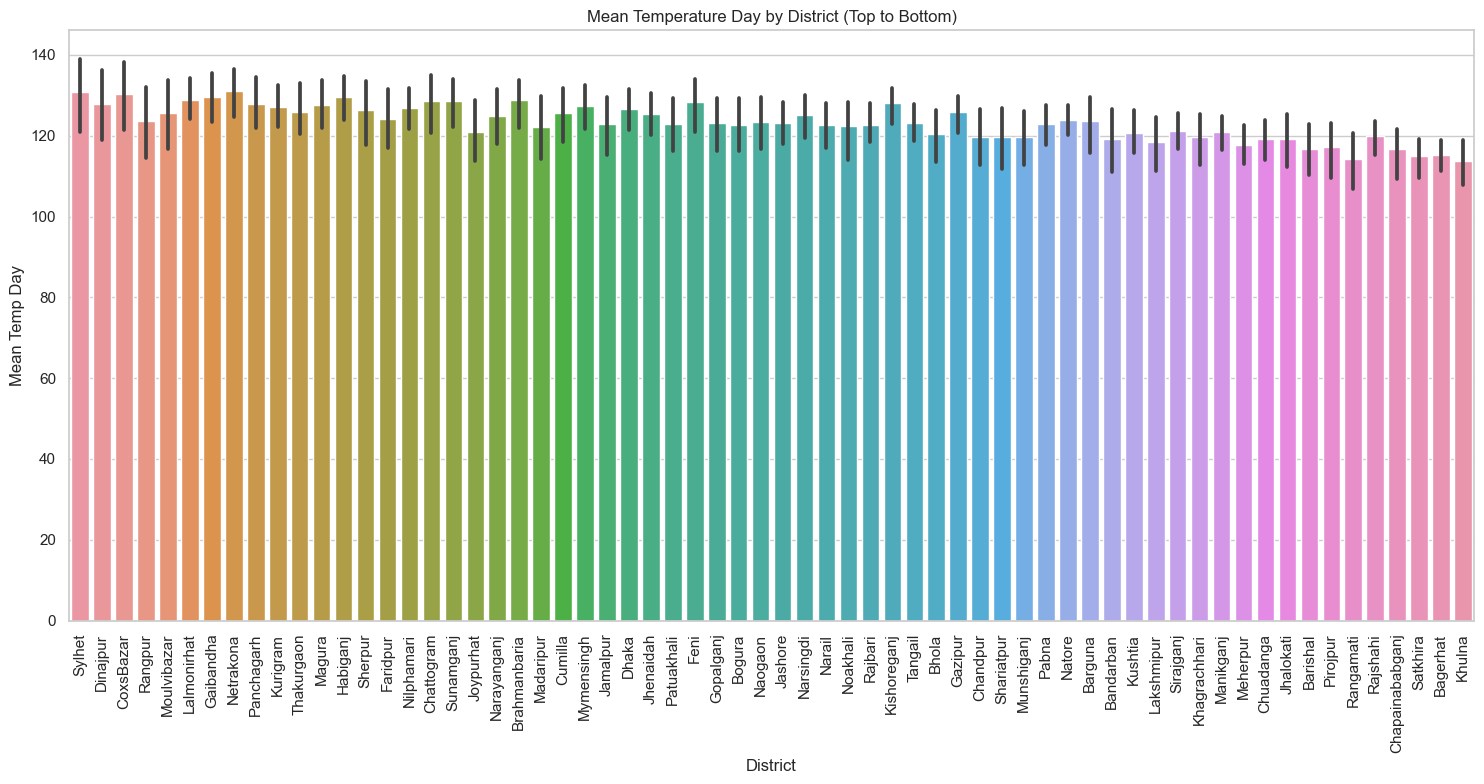

In [36]:
# Sort the data by 'mean_temp_day' in descending order
sorted_districts = merged_data_no_outliers.sort_values(by='mean_temp_day', ascending=False)

# Set the style for the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
barplot = sns.barplot(x='district', y='mean_temp_day', data=sorted_districts)

# Set plot labels and title
plt.xlabel('District')
plt.ylabel('Mean Temp Day')
plt.title('Mean Temperature Day by District (Top to Bottom)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


##### District Sylhet followed by Dinajpur and CoxsBazar recorded highest temperature in day

### Top 10 district Mean temp day 

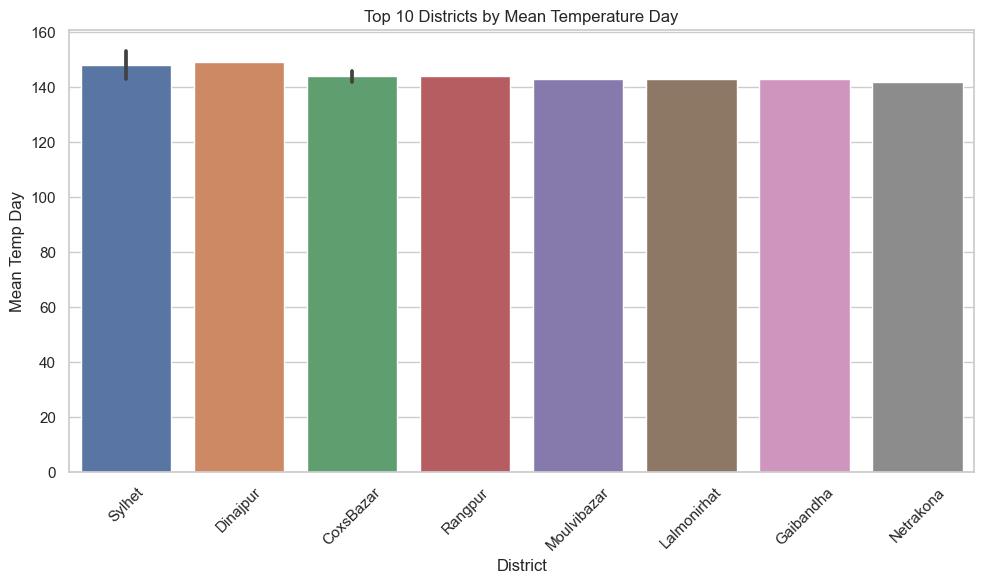

In [37]:
# Sort the data by 'mean_temp_day' in descending order and select the top 10 districts
top_10_districts = merged_data_no_outliers.sort_values(by='mean_temp_day', ascending=False).head(10)

# Set the style for the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='district', y='mean_temp_day', data=top_10_districts)

# Set plot labels and title
plt.xlabel('District')
plt.ylabel('Mean Temp Day')
plt.title('Top 10 Districts by Mean Temperature Day')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


###### District Sylhet recorded highest frequency mean temperature day

### Mean_Temp_Night for all 64 districts

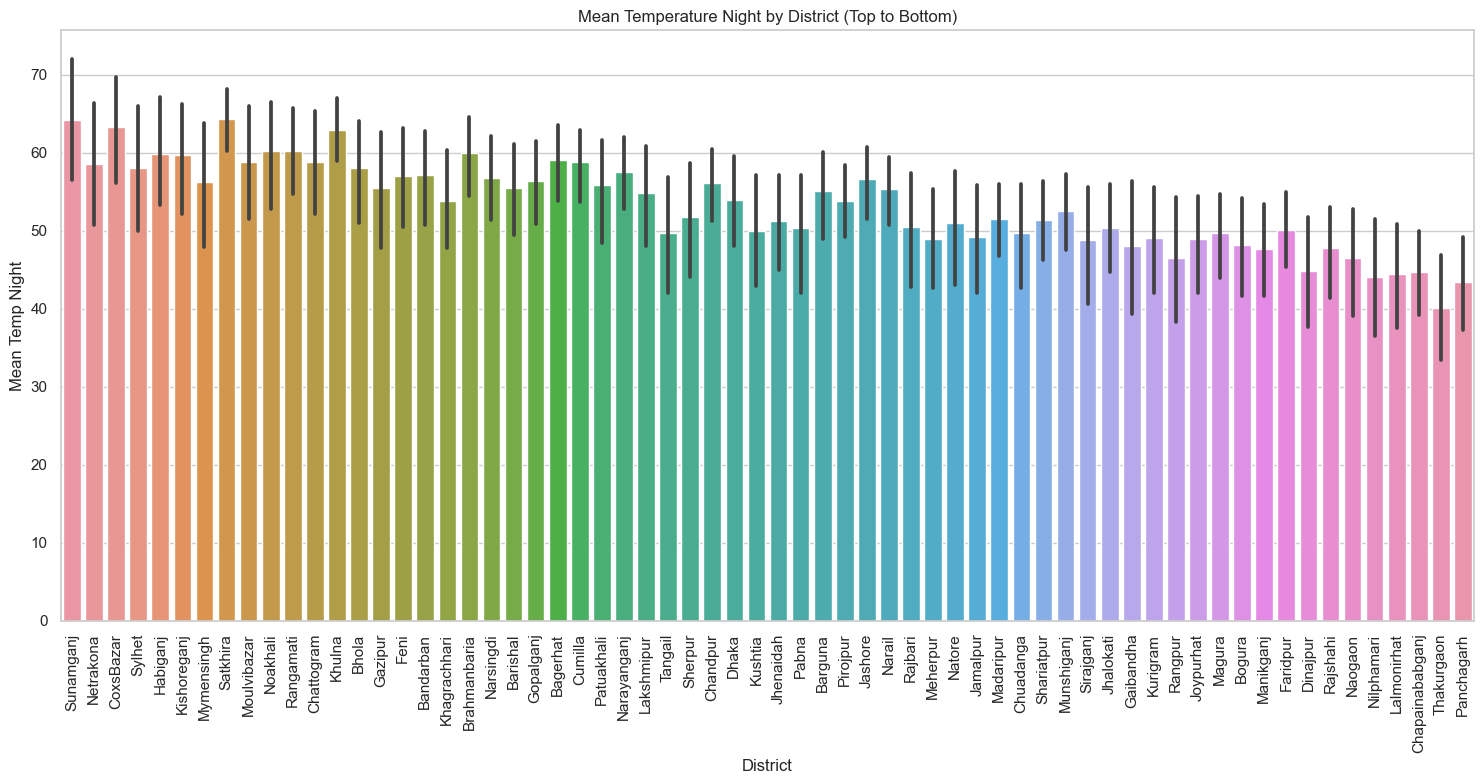

In [38]:
# Sort the data by 'mean_temp_night' in descending order
sorted_districts = merged_data_no_outliers.sort_values(by='mean_temp_night', ascending=False)

# Set the style for the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
barplot = sns.barplot(x='district', y='mean_temp_night', data=sorted_districts)

# Set plot labels and title
plt.xlabel('District')
plt.ylabel('Mean Temp Night')
plt.title('Mean Temperature Night by District (Top to Bottom)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


##### District Sunamganj recorded highest frequency in mean temperature night

### Top 10 district Mean temp night 

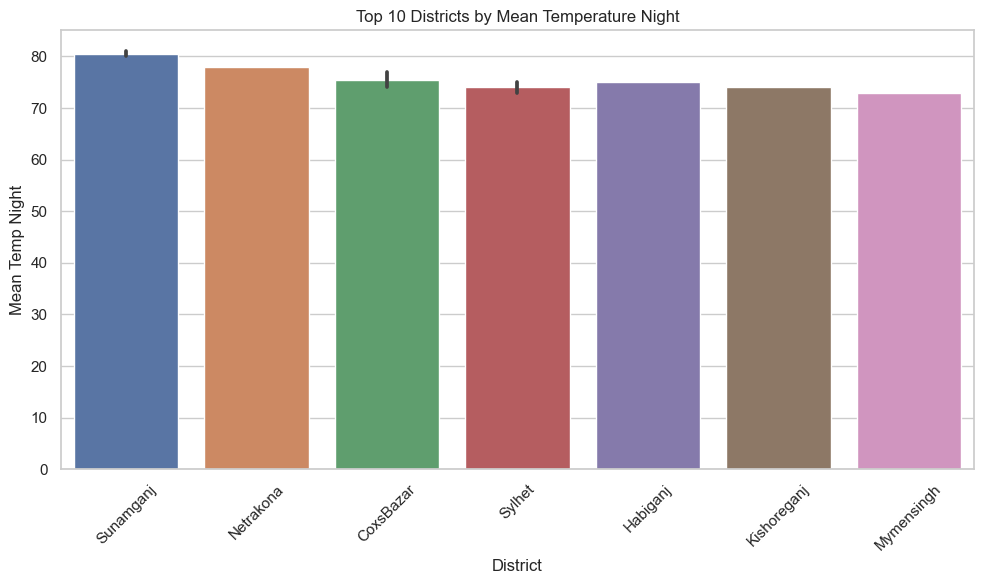

In [39]:
# Sort the data by 'mean_temp_night' in descending order and select the top 10 districts
top_10_districts = merged_data_no_outliers.sort_values(by='mean_temp_night', ascending=False).head(10)

# Set the style for the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='district', y='mean_temp_night', data=top_10_districts)

# Set plot labels and title
plt.xlabel('District')
plt.ylabel('Mean Temp Night')
plt.title('Top 10 Districts by Mean Temperature Night')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

##### District Sunamganj & Netrakona shown highest mean temp in night 